## Theano-MPI speed-up vs n-workers (GPUs) plot 

Setting up the plotting environment

In [43]:
%matplotlib notebook

import numpy as np

# Set fonts
import matplotlib
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', variant='normal') 
# matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('font', stretch='semi-condensed')
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 10})

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_family('serif')
fontP.set_variant('normal')
# fontP.set_size('normal')
fontP.set_stretch('semi-condensed')

colors = ['r', 'b', 'm', 'g', 'k', 'y', 'c']
linestyles = ['-', '--', ':','-', '--', '-.']
linewidths = [2.0,3.0,3.0,1.0, 1.0, 1.0]
markers = [None,None,None,'>', None,None]

The results are gathered with Theano-MPI pygpu branch where the communication where based on half precision. 

- The file waiting times are ignored in the result because waiting time depends on the busy level of the file server. The time for finishing one epoch of training (going through the whole dataset once) were recorded and gathered below in the order of [ 1GPU, 2GPU, 4GPU, 8GPU] in hours.

- The sync times (marked as comments # + x.xx ) will be ignored when calculating speed-up, as the sync-time is hardware dependent, i.e. how GPUs are in sync with each other's frequency and how processes on CPUs are in sync with each other.

based on NCCL32, tested on cop3 cop4
8 GPUs (dual socket on copper, NUMA) results are benchmarked with `-bind` option

In [44]:
mlp = [0.104, 0.244, 0.197, 0.124]


t_1GPU=  63.89
t_2GPU=  (31.40 + 1.00)  # +2.89
t_4GPU=  (15.51 + 0.71) # + 1.30
t_8GPU=  (7.69 + 0.80)  # + 0.61

google_32b = [t_1GPU, t_2GPU, t_4GPU, t_8GPU] 


t_1GPU= 20.50 
t_2GPU= (10.35 + 0.78)   #  + 1.06 
t_4GPU= (5.13 + 0.54)   #  + 2.09
t_8GPU= (2.63 + 0.61)  #  + 3.03

#t_8GPU (no-bind): (2.61 + 1.31) #  + 7.84 

alex_128b = [t_1GPU, t_2GPU, t_4GPU, t_8GPU] 


t_1GPU=  358.29        
t_2GPU=  (176.08 + 13.90)  # + 17.31
t_4GPU=  (90.44 + 9.28)   #  + 5.27 
t_8GPU=  (55.12 + 12.59)  #  + 3.93 

vgg16_16b = [t_1GPU, t_2GPU, t_4GPU, t_8GPU] 


t_1GPU= 343.37    
t_2GPU= (169.12 + 7.14)     # +36.50 x
t_4GPU= (86.97 + 4.80)   # +22.72 x
t_8GPU= (43.29 + 5.41)  # +3.75 x

vgg16_32b = [t_1GPU, t_2GPU, t_4GPU, t_8GPU] 


t_1GPU= 163.15
t_2GPU= 80.09+ 0.81 #  + 7.66 
t_4GPU= 40.25+ 0.56 #  + 3.36 
t_8GPU= 20.12+ 0.56 # + 1.90 

resnet50_64b = [t_1GPU, t_2GPU, t_4GPU, t_8GPU] 
 

In [45]:
record_list = [google_32b, alex_128b,vgg_16b,vgg_32b,resnet50_64b]
axis_list = [1,2,4,8]
record_list = [[l[0]/e for e in l] for l in record_list]
labels = ['GoogLeNet_32b', 'AlexNet_128b','VGGNet_16b','VGGNet_32b', 'ResNet50_64b']      


make a function for the convenience of plotting in log scale

In [46]:
def plot_record(ax, ax_list, record_list,labels):

    for i in range(len(record_list)):
        
        ax_l = ax_list[:len(record_list[i])]

        line = ax.semilogx(ax_l, record_list[i], basex=2)
        
        plt.setp(line, linewidth=linewidths[i], linestyle=linestyles[i],\
        marker=markers[i],color=colors[i], label=labels[i], markersize=5, markevery=1)
    
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='upper left', prop = fontP) 

plot the lines

<IPython.core.display.Javascript object>


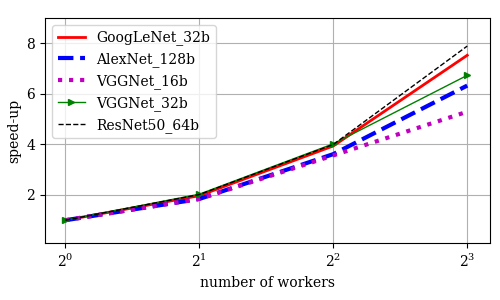

In [47]:
fig = plt.figure(1, figsize=(5,3))
fig.subplots_adjust(left = 0.09, bottom = 0.19,
                                right = 0.98, top = 0.94,
                                hspace = 0.14)

    
ax = plt.subplot(111)
ax.set_xlim(0.9,9)
ax.set_ylim(0.1,9)

plot_record(ax, axis_list, record_list, labels)
plt.grid(True)    
plt.xlabel("number of workers")
plt.ylabel("speed-up")   
#plt.yticks(np.arange(0.1,1,0.1))
plt.grid(True)

plt.show()

#fig.savefig('cross.pdf',format='pdf')